In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split ,GridSearchCV 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics 
from sklearn.metrics import accuracy_score,confusion_matrix

In [27]:
from sklearn.metrics import confusion_matrix,classification_report
import sklearn
from sklearn.impute import SimpleImputer

In [106]:
url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [107]:
data =titanic.copy().drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)

In [108]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [109]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [110]:
data['Age']=data['Age'].replace(np.nan,data['Age'].mean()).round(2)

In [111]:
data['Sex_New']=(data.Sex=='male').astype('int')
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Sex_New
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,0
4,0,3,male,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,1
887,1,1,female,19.0,0,0,30.0000,0
888,0,3,female,29.7,1,2,23.4500,0
889,1,1,male,26.0,0,0,30.0000,1


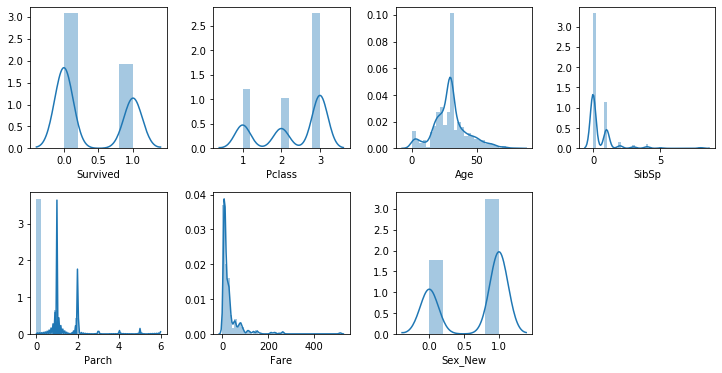

In [112]:
plt.figure(figsize=(10,10))
pt=1
for i in data.drop('Sex',axis=1):
    if pt <= 7:
        plt.subplot(4,4,pt)
        sns.distplot(data[i])
        plt.xlabel(i)
    pt+=1
plt.tight_layout()    

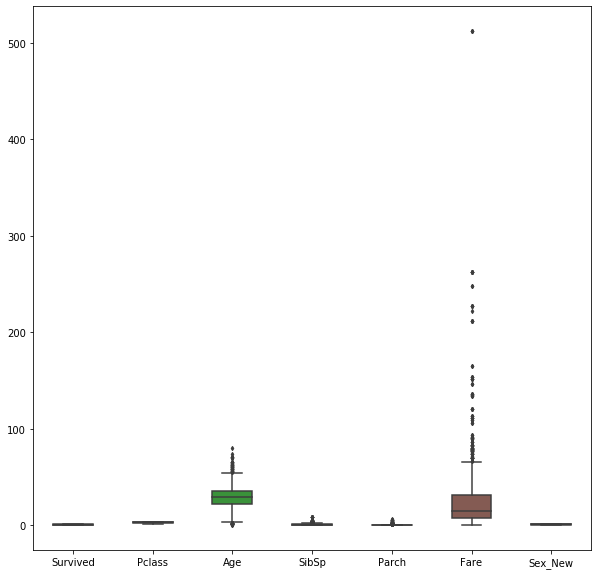

In [113]:
fig ,ax =plt.subplots(figsize=(10,10))
sns.boxplot(data=data.drop('Sex',axis=1),width=.5,ax=ax,fliersize=3)

In [114]:
data.drop(['Sex'] ,inplace=True ,axis=1)

In [115]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_New
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,29.7,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [116]:
x=data.drop(['Survived'] ,axis=1)
y=data['Survived']

In [117]:
print('The shape of x is :',x.shape)
print('The shape of y is :',y.shape)

The shape of x is : (891, 6)
The shape of y is : (891,)


In [118]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =.25 ,random_state=0)

In [119]:
print('The shape of x_train is :',x_train.shape)
print('The shape of y_train is :',y_train.shape)
print('The shape of x_test is :',x_test.shape)
print('The shape of y_test is :',y_test.shape)

The shape of x_train is : (668, 6)
The shape of y_train is : (668,)
The shape of x_test is : (223, 6)
The shape of y_test is : (223,)


In [120]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [124]:
print('Accuracy of training data is : ',dt.score(x_train,y_train))
print('Accuracy of testing data is : ',dt.score(x_test,y_test))
y_pred=dt.predict(x_test)

Accuracy of training data is :  0.9805389221556886
Accuracy of testing data is :  0.7802690582959642


In [127]:
accuracy_score(y_test,y_pred)


0.7802690582959642

In [128]:
confusion_matrix(y_test,y_pred)

array([[116,  23],
       [ 26,  58]], dtype=int64)

In [129]:
param={
        "criterion" : ['gini','entropy'],
        "max_depth" : range(2,5,1),
        "min_samples_split" : range(2,4,1),
        "splitter" :['best','random']
}

In [130]:
grid= GridSearchCV(dt,param_grid=param,scoring='accuracy' ,n_jobs=-1,cv=5,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    5.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 5),
                         'mi

In [131]:
print('The best parameters are: ',grid.best_params_,' & best score is : ',grid.best_score_)

The best parameters are:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'splitter': 'best'}  & best score is :  0.8233532934131736


In [132]:
dt1=DecisionTreeClassifier(criterion= 'gini', max_depth= 3, min_samples_split= 2, splitter= 'best')
dt1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [133]:
print('The sxores for training data is: ',dt1.score(x_train,y_train))
print('The sxores for testing data is: ',dt1.score(x_test,y_test))

The sxores for training data is:  0.8368263473053892
The sxores for testing data is:  0.8161434977578476


In [ ]:
# We can also use Logistic Regression to check the performance which one is better

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
print('The sxores for training data is: ',lr.score(x_train,y_train))
print('The sxores for testing data is: ',lr.score(x_test,y_test))

The sxores for training data is:  0.8008982035928144
The sxores for testing data is:  0.7847533632286996


In [137]:
param_g={
    "C":[.001,.01,.1,1,10],
    'penalty' :['l2'],
    'solver' : ['liblinear','newton-cg','sag','lbfgs']
}

In [138]:
grid1= GridSearchCV(lr,param_grid=param_g,scoring='accuracy' ,n_jobs=-1,cv=5,verbose=3)
grid1.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear', 'newton-cg', 'sag', 'lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [139]:
print('The best parameters are: ',grid1.best_params_,' & best score is : ',grid1.best_score_)

The best parameters are:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}  & best score is :  0.8053892215568862


In [140]:
lr1=LogisticRegression(C= 1, penalty= 'l2', solver= 'liblinear')
lr1.fit(x_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
print('The sxores for training data is: ',lr1.score(x_train,y_train))
print('The sxores for testing data is: ',lr1.score(x_test,y_test))

The sxores for training data is:  0.8008982035928144
The sxores for testing data is:  0.7847533632286996
